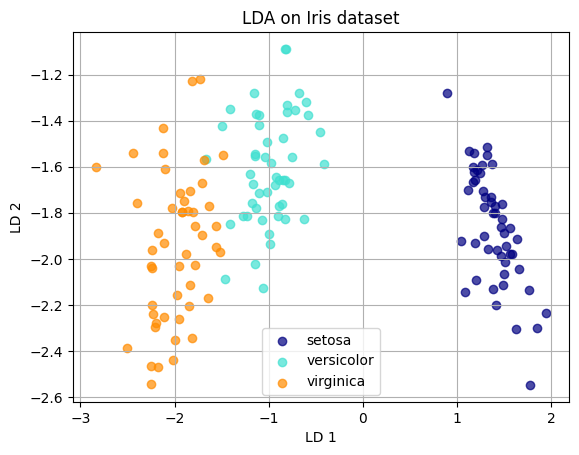

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
classes = np.unique(y)

# Compute mean vectors
overall_mean = np.mean(X, axis=0)
mean_vectors = []
for cl in classes:
    mean_vectors.append(np.mean(X[y == cl], axis=0))

# Compute within-class scatter matrix Sw
Sw = np.zeros((X.shape[1], X.shape[1]))
for cl, mean_vec in zip(classes, mean_vectors):
    class_scatter = np.zeros((X.shape[1], X.shape[1]))
    for row in X[y == cl]:
        row, mv = row.reshape(-1, 1), mean_vec.reshape(-1, 1)
        class_scatter += (row - mv) @ (row - mv).T
    Sw += class_scatter

# Compute between-class scatter matrix Sb
Sb = np.zeros((X.shape[1], X.shape[1]))
for i, mean_vec in enumerate(mean_vectors):
    n = X[y == i, :].shape[0]
    mean_vec = mean_vec.reshape(-1, 1)
    overall_mean_vec = overall_mean.reshape(-1, 1)
    Sb += n * (mean_vec - overall_mean_vec) @ (mean_vec - overall_mean_vec).T

# Solve the generalized eigenvalue problem
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(Sw) @ Sb)

# Sort eigenvectors by eigenvalues
sorted_indices = np.argsort(abs(eigvals))[::-1]
eigvecs = eigvecs[:, sorted_indices]
W = eigvecs[:, :2]

# Project data
X_lda = X @ W

# Plot
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
for i, color, label in zip([0, 1, 2], colors, target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=label, color=color, alpha=0.7)
plt.title("LDA on Iris dataset")
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend()
plt.grid(True)
plt.show()
